## Data Scaling Exercises

Do your work for these exercises in a jupyter notebook named ```scaling```. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1.  Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import wrangle
from wrangle import wrangle_telco


In [3]:
train, validate, test = wrangle_telco()

In [4]:
train

,customer_id,tenure,monthly_charges,total_charges
1256,7501-IWUNG,61,73.80,4616.05
225,1303-SRDOK,55,69.05,3842.60
662,3967-VQOGC,67,24.90,1680.25
628,3777-XROBG,58,19.55,1079.65
824,5075-JSDKI,59,24.45,1493.10
...,...,...,...,...
441,2664-XJZNO,72,104.90,7559.55
98,0567-XRHCU,69,43.95,2960.10
886,5334-AFQJB,72,25.10,1789.90
322,2001-MCUUW,46,108.65,4903.20


In [5]:
x_train = train.drop(columns = ['customer_id'],axis=1)
x_validate = validate.drop(columns = ['customer_id'],axis=1)
x_test = test.drop(columns = ['customer_id'],axis=1)

In [6]:
# Min-max scaling

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

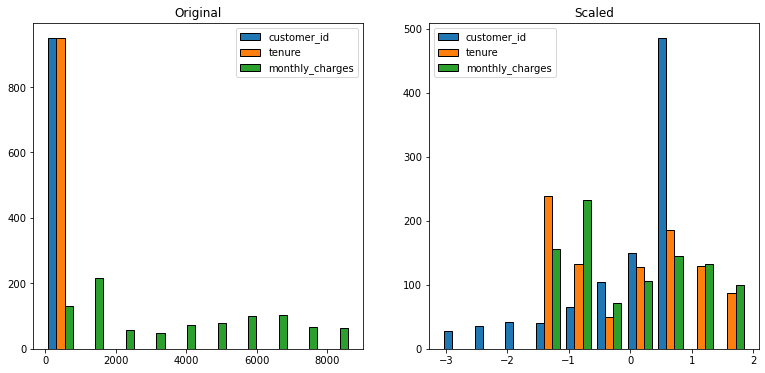

In [14]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.legend(train)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

In [9]:
# Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

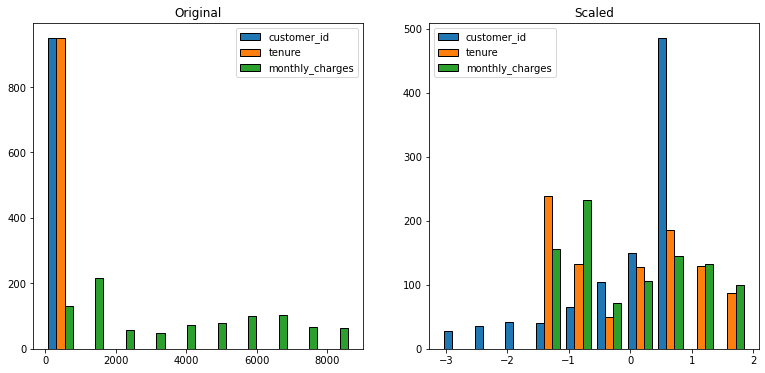

In [15]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

In [15]:
# Robust Scaler

scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

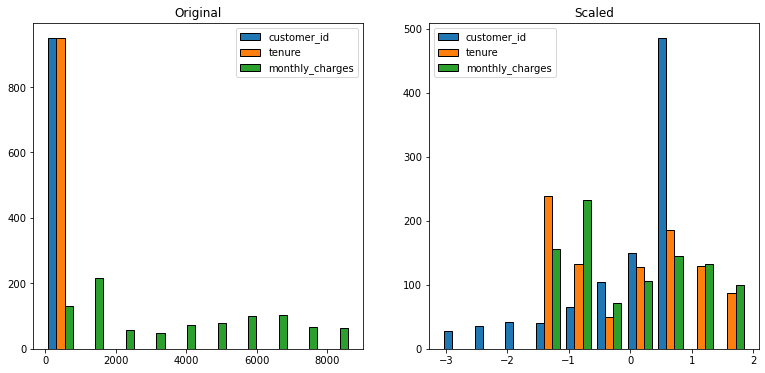

In [16]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled,bins=10,ec='black')
plt.title('Scaled')
plt.legend(train)

2.Apply the '''.inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [18]:
# Min-max scaling

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(x_train)

x_train_scaled_inv = scaler.inverse_transform(x_train)
x_validate_scaled_inv = scaler.inverse_transform(x_validate)
x_test_scaled_inv = scaler.inverse_transform(x_test)

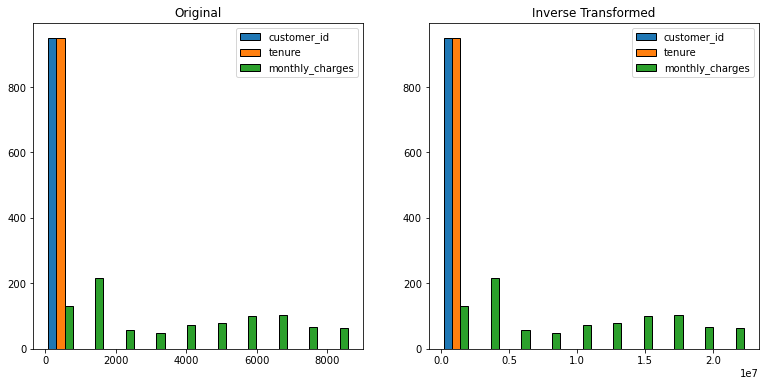

In [27]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled_inv,bins=10,ec='black')
plt.title('Inverse Transformed')
plt.legend(train)

In [20]:
# Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled_inv = scaler.inverse_transform(x_train)
x_validate_scaled_inv = scaler.inverse_transform(x_validate)
x_test_scaled_inv = scaler.inverse_transform(x_test)

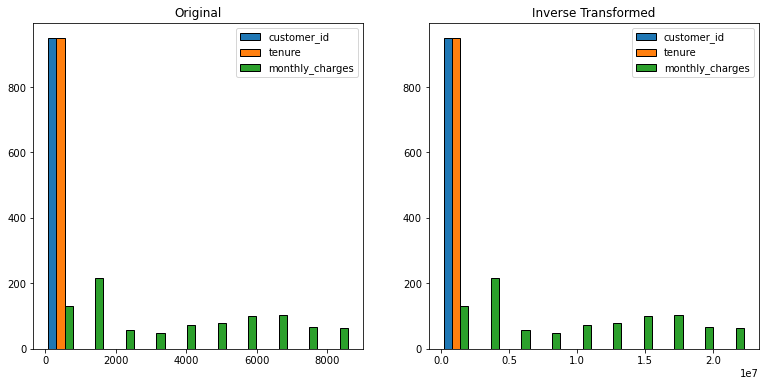

In [24]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled_inv,bins=10,ec='black')
plt.title('Inverse Transformed')
plt.legend(train)

In [15]:
# Robust Scaler

scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(x_train)

x_train_scaled_inv = scaler.inverse_transform(x_train)
x_validate_scaled_inv = scaler.inverse_transform(x_validate)
x_test_scaled_inv = scaler.inverse_transform(x_test)

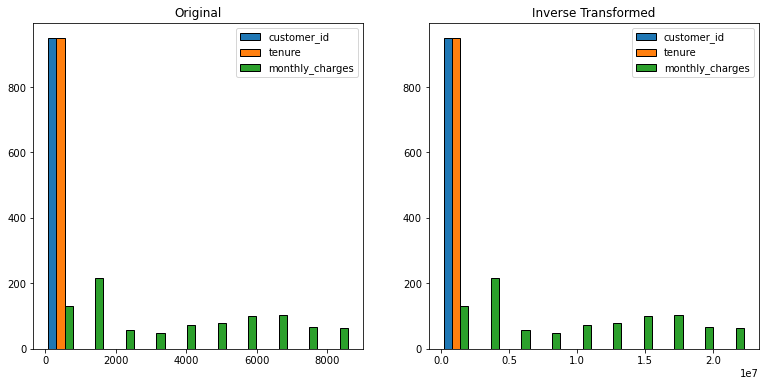

In [23]:
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_scaled_inv,bins=10,ec='black')
plt.title('Inverse Transformed')
plt.legend(train)

3. Read the documentation for sklearn's ```QuantileTransformer```. Use ```normal``` for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.



Documentation: ```sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='normal', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)```

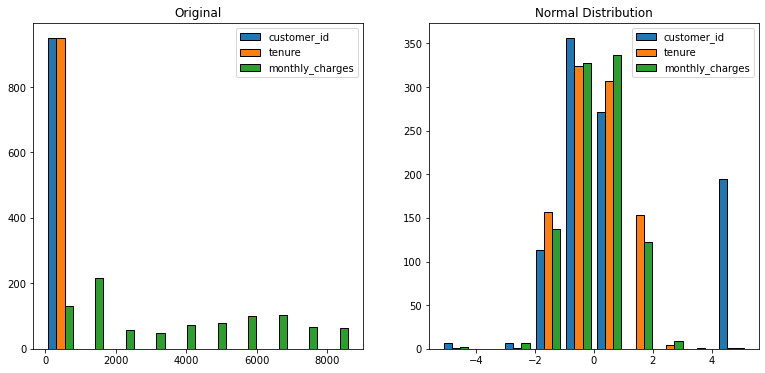

In [25]:
qt = QuantileTransformer(n_quantiles=10, output_distribution = 'normal', random_state=0)
x_train_qt = qt.fit_transform(x_train)

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_qt,bins=10,ec='black')
plt.title('Normal Distribution')
plt.legend(train)


4.  Use the ```QuantileTransformer```, but omit the ```output_distribution``` argument. Visualize your results. What do you notice?


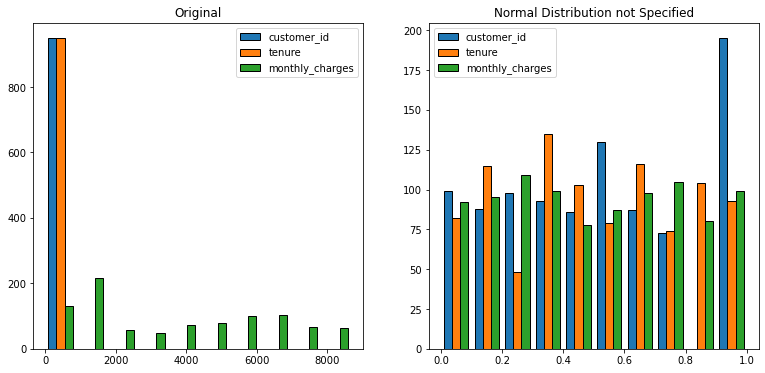

In [26]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
x_train_qt = qt.fit_transform(x_train)

plt.figure(figsize=(13,6))
plt.subplot(121)
plt.hist(x_train, bins=10, ec='black')
plt.title('Original')
plt.legend(train)
plt.subplot(122)
plt.hist(x_train_qt,bins=10,ec='black')
plt.title('Normal Distribution not Specified')
plt.legend(train)



5.  Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
import sklearn.preprocessing

def scale():
    '''
    This function accepts train, validate and test data splits and
    returns the scaled versions of each.
    '''
    
    x_train = train.drop(columns = ['customer_id'],axis=1)
    x_validate = validate.drop(columns = ['customer_id'],axis=1)
    x_test = test.drop(columns = ['customer_id'],axis=1)
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(x_train)

    x_train_scaled_inv = scaler.inverse_transform(x_train)
    x_validate_scaled_inv = scaler.inverse_transform(x_validate)
    x_test_scaled_inv = scaler.inverse_transform(x_test)
    
    return train_scaled, validate_scaled, test_scaled